In [22]:
import sys
sys.path.append('/Users/glebdovzhenko/Dropbox/PycharmProjects/DissertationPlots')


In [23]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from data import tc_data, deposited_mass, stud_length, model_heat_input, model_bonding_t, model_tc_data
import os
from sklearn.linear_model import LinearRegression
import numpy as np

%matplotlib inline
textwidth = 390.  # pt
plt.rcParams['figure.figsize'] = (textwidth / 72., textwidth / 72. * 9. / 16.)  # inches
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['text.usetex'] = True

stud_length0, stud_mass0 = 125.0, 106.1

scale_ti = (-45, 45, -300, 500)
scale_al = (-45, 45, -150, 220)
scale_temp = (-10, 20, -150, 600)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sxl, syl, szl = 'Transverse ($\sigma_x$)', 'Longitudinal ($\sigma_y$)', 'Normal ($\sigma_z$)'
pxl, pyl, pzl = 'Distance from weld center $x$ [mm]', 'Distance from depos. start $y$ [mm]', 'Substrate depth $z$ [mm]'
stress_l = 'Residual stress $\sigma$ [MPa]'
time_l, temp_l, eff_l = 'Time, [s]', 'Temperature, [$^{\circ}$C]', 'Deposition efficiency $\eta$ [\%]'
th_l, hi_l = 'Substrate thickness [mm]', 'Model heat input dQ [arb. units]'

dd = {'Al': 'Al, $20^{\circ}$ C', 'Ti': 'Ti, $20^{\circ}$ C',
      'Al/LN2': 'Al, $-120^{\circ}$ C', 'Ti/LN2': 'Ti, $-120^{\circ}$ C',
      'Ks': 'Ks, $20^{\circ}$ C'}

plot_prefix = 'FSTMAl'
plot_wd = '/Users/glebdovzhenko/Dropbox/Apps/Overleaf/THESIS/pictures/'

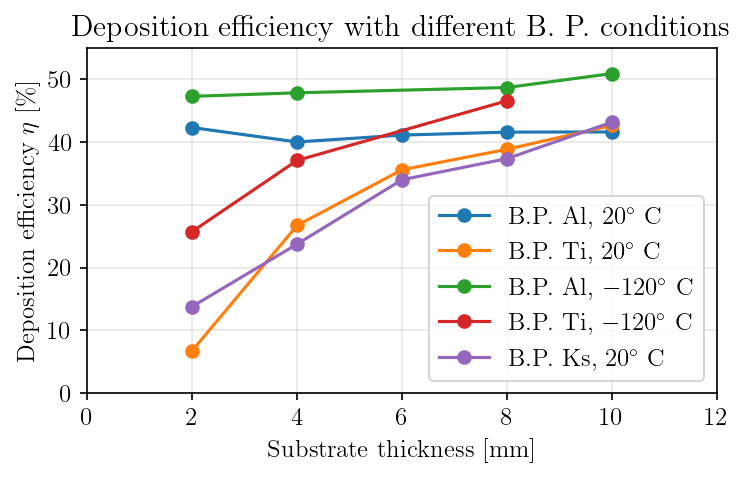

In [24]:
plt.figure()

for bp in ('Al', 'Ti', 'Al/LN2', 'Ti/LN2', 'Ks'):
    plt.plot(100. * (deposited_mass['Al6082', 16, :, bp] / stud_mass0) / 
             ((stud_length0 - stud_length['Al6082', 16, :, bp]) / stud_length0), marker='o', linestyle='-', 
             label='B.P. %s' % dd[bp])
plt.title('Deposition efficiency with different B. P. conditions')
plt.xlabel(th_l)
plt.ylabel(eff_l)
plt.grid(which='both', axis='both', alpha=0.3)

leg = plt.legend()
plt.axis((0, 12, 0, 55))
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'deposition_efficiency.png'), additional_artists=[leg], 
            bbox_inches="tight", pad_inches=0)

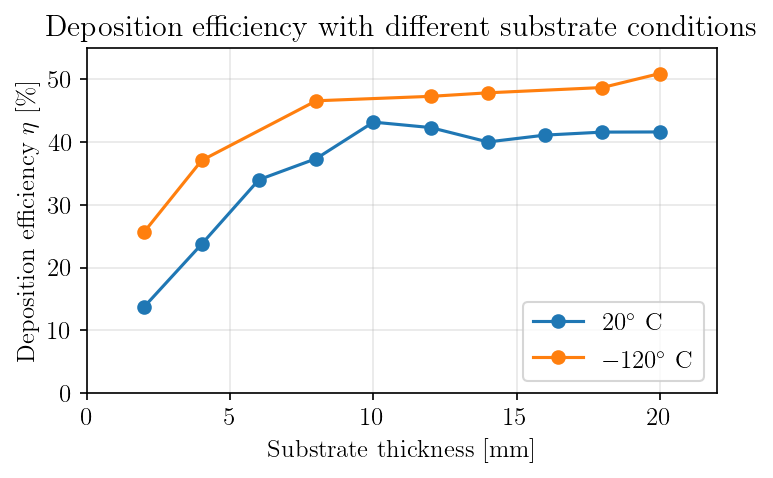

In [25]:
plt.figure()
l1 = 100. * (deposited_mass['Al6082', 16, :, 'Ks'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', 16, :, 'Ks']) 
                                                                    / stud_length0)
l2 = 100. * (deposited_mass['Al6082', 16, :, 'Al'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', 16, :, 'Al']) 
                                                                    / stud_length0)
l2.index += 10
l1 = l1.append(l2)
l3 = 100. * (deposited_mass['Al6082', 16, :, 'Al/LN2'] / stud_mass0) / \
     ((stud_length0 - stud_length['Al6082', 16, :, 'Al/LN2']) / stud_length0)
l4 = 100. * (deposited_mass['Al6082', 16, :, 'Ti/LN2'] / stud_mass0) / \
     ((stud_length0 - stud_length['Al6082', 16, :, 'Ti/LN2']) / stud_length0)
l3.index += 10
l3 = l4.append(l3)

plt.plot(l1.index, l1.values, marker='o', linestyle='-', label='$20^{\circ}$ C')
plt.plot(l3.index, l3.values, marker='o', linestyle='-', label='$-120^{\circ}$ C')
plt.grid(which='both', axis='both', alpha=0.3)

plt.title('Deposition efficiency with different substrate conditions')
plt.xlabel(th_l)
plt.ylabel(eff_l)
leg = plt.legend();
plt.axis((0, 22, 0, 55))
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'deposition_efficiency2.png'),  
            additional_artists=[leg], bbox_inches="tight", pad_inches=0)

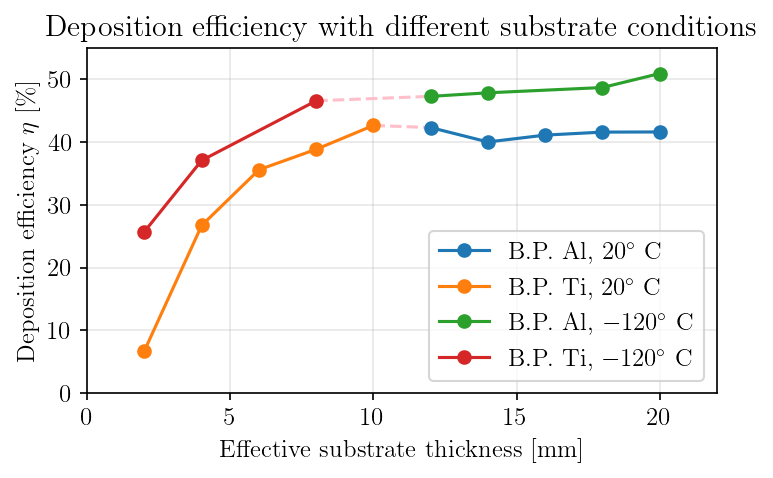

In [26]:
plt.figure()

eff_al_rt = 100. * (deposited_mass['Al6082', 16, :, 'Al'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', 16, :, 'Al']) / stud_length0)
eff_ti_rt = 100. * (deposited_mass['Al6082', 16, :, 'Ti'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', 16, :, 'Ti']) / stud_length0)
eff_al_ln = 100. * (deposited_mass['Al6082', 16, :, 'Al/LN2'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', 16, :, 'Al/LN2']) / stud_length0)
eff_ti_ln = 100. * (deposited_mass['Al6082', 16, :, 'Ti/LN2'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', 16, :, 'Ti/LN2']) / stud_length0)

plt.plot([10, 12], [eff_ti_rt.values[-1], eff_al_rt.values[0]], label=None, linestyle='--', color='pink')
plt.plot([8, 12], [eff_ti_ln.values[-1], eff_al_ln.values[0]], label=None, linestyle='--', color='pink')

plt.plot(eff_al_rt.index+10, eff_al_rt.values, marker='o', linestyle='-', label='B.P. %s' % dd['Al'])
plt.plot(eff_ti_rt, marker='o', linestyle='-', label='B.P. %s' % dd['Ti'])
plt.plot(eff_al_ln.index+10, eff_al_ln.values, marker='o', linestyle='-', label='B.P. %s' % dd['Al/LN2'])
plt.plot(eff_ti_ln, marker='o', linestyle='-', label='B.P. %s' % dd['Ti/LN2'])

plt.grid(which='both', axis='both', alpha=0.3)

plt.title('Deposition efficiency with different substrate conditions')
plt.xlabel('Effective substrate thickness [mm]')
plt.ylabel(eff_l)
leg = plt.legend();
plt.axis((0, 22, 0, 55))
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'deposition_efficiency3.png'),  
            additional_artists=[leg], bbox_inches="tight", pad_inches=0)

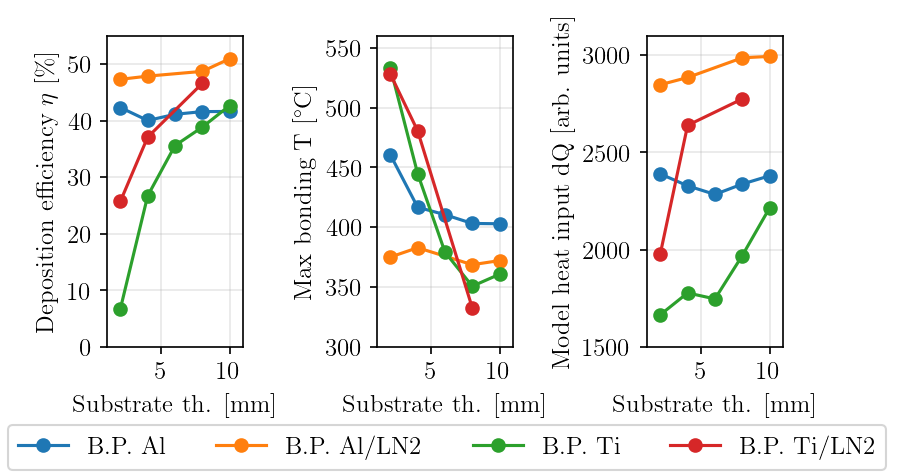

In [27]:
fig = plt.figure()
grid = plt.GridSpec(1, 3, width_ratios=(1, 1, 1))

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])

ax1.grid(which='both', axis='both', alpha=0.3)
ax2.grid(which='both', axis='both', alpha=0.3)
ax3.grid(which='both', axis='both', alpha=0.3)

for bp in ('Al', 'Al/LN2', 'Ti', 'Ti/LN2'):
    ax1.plot(100. * (deposited_mass['Al6082', 16, :, bp] / stud_mass0) / 
             ((stud_length0 - stud_length['Al6082', 16, :, bp]) / stud_length0), 
             linestyle='-', marker='o', label='$\eta$ B.P. %s' % bp)
    ax2.plot(model_bonding_t['Al6082', 16, :, bp], linestyle='-', marker='o', label='$T_{max}$ B.P. %s' % bp)
    ax3.plot(model_heat_input['Al6082', 16, :, bp], linestyle='-', marker='o', label='dQ B.P. %s' % bp)

ax1.axis((1, 11, 0, 55))
ax2.axis((1, 11, 300, 560))
ax3.axis((1, 11, 1500, 3100))

ax1.set_xlabel('Substrate th. [mm]')
ax2.set_xlabel('Substrate th. [mm]')
ax3.set_xlabel('Substrate th. [mm]')

ax1.set_ylabel(eff_l)
ax2.set_ylabel('Max bonding T [$^{\circ}$C]')
ax3.set_ylabel(hi_l)

plt.tight_layout()
fig.subplots_adjust(bottom=0.25)
leg = fig.legend(['B.P. %s' % bp for bp in ('Al', 'Al/LN2', 'Ti', 'Ti/LN2')], ncol=4, 
                 loc='lower center', bbox_to_anchor=(0.55, -0.02))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'modeling_results.png'), 
            additional_artists=[leg], bbox_inches="tight")

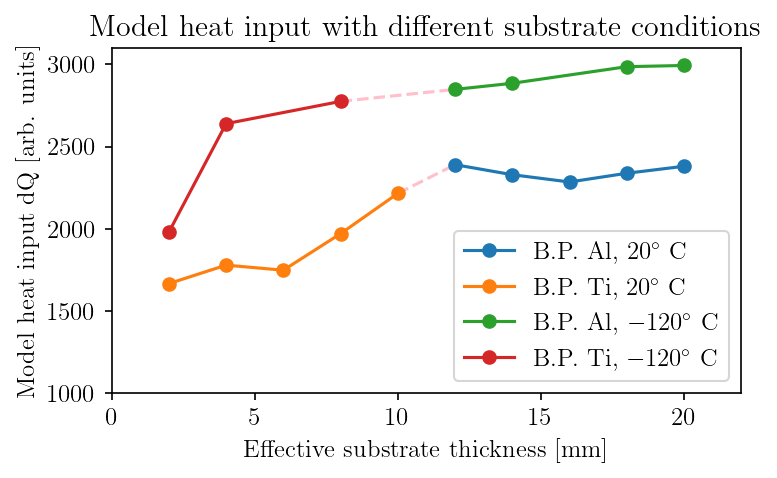

In [28]:
plt.figure()

mhi_al_rt = model_heat_input['Al6082', 16, :, 'Al']
mhi_al_ln = model_heat_input['Al6082', 16, :, 'Al/LN2']
mhi_ti_rt = model_heat_input['Al6082', 16, :, 'Ti']
mhi_ti_ln = model_heat_input['Al6082', 16, :, 'Ti/LN2']

plt.plot([10, 12], [mhi_ti_rt.values[-1], mhi_al_rt.values[0]], label=None, linestyle='--', color='pink')
plt.plot([8, 12], [mhi_ti_ln.values[-1], mhi_al_ln.values[0]], label=None, linestyle='--', color='pink')

plt.plot(mhi_al_rt.index + 10, mhi_al_rt.values, linestyle='-', marker='o', label='B.P. %s' % dd['Al'])
plt.plot(mhi_ti_rt, linestyle='-', marker='o', label='B.P. %s' % dd['Ti'])
plt.plot(mhi_al_ln.index + 10, mhi_al_ln.values, linestyle='-', marker='o', label='B.P. %s' % dd['Al/LN2'])
plt.plot(mhi_ti_ln, linestyle='-', marker='o', label='B.P. %s' % dd['Ti/LN2'])

plt.title('Model heat input with different substrate conditions')
plt.xlabel('Effective substrate thickness [mm]')
plt.ylabel(hi_l)
leg = plt.legend();
plt.axis((0, 22, 1000, 3100))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'heat_input_vs_th.png'),  
            additional_artists=[leg], bbox_inches="tight", pad_inches=0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


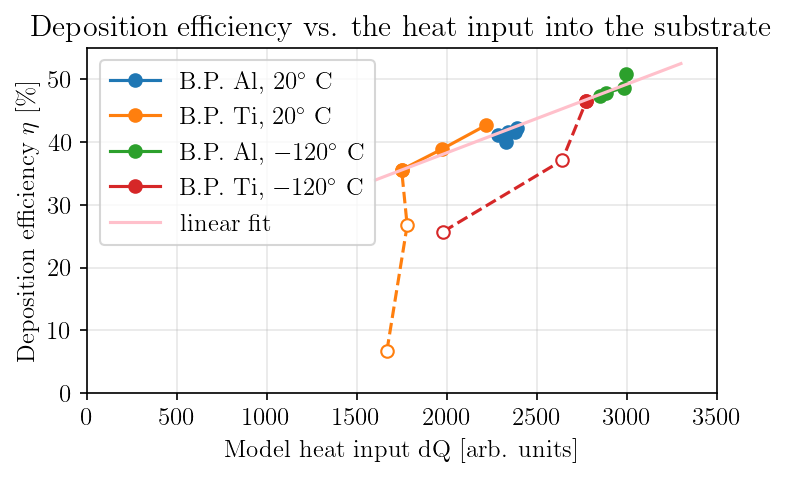

In [29]:
plt.figure()
xs, ys = [], []
    
xs.extend(model_heat_input['Al6082', 16, :, 'Al'].tolist())
ys.extend((100. * (deposited_mass['Al6082', 16, :, 'Al'] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Al']) / stud_length0)).tolist())
plt.plot(model_heat_input['Al6082', 16, :, 'Al'], 
         100. * (deposited_mass['Al6082', 16, :, 'Al'] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Al']) / stud_length0), 
         linestyle='-', marker='o', label='B.P. %s' % dd['Al'])

plt.plot(model_heat_input['Al6082', 16, :, 'Ti'][:3], 
         100. * (deposited_mass['Al6082', 16, :, 'Ti'][:3] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Ti'][:3]) / stud_length0), 
         linestyle='--', marker='o', label=None, color=colors[1], markerfacecolor='white')
xs.extend(model_heat_input['Al6082', 16, :, 'Ti'][2:].tolist())
ys.extend((100. * (deposited_mass['Al6082', 16, :, 'Ti'][2:] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Ti'][2:]) / stud_length0)).tolist())
plt.plot(model_heat_input['Al6082', 16, :, 'Ti'][2:], 
         100. * (deposited_mass['Al6082', 16, :, 'Ti'][2:] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Ti'][2:]) / stud_length0), 
         linestyle='-', marker='o', label='B.P. %s' % dd['Ti'], color=colors[1])

xs.extend(model_heat_input['Al6082', 16, :, 'Al/LN2'].tolist())
ys.extend((100. * (deposited_mass['Al6082', 16, :, 'Al/LN2'] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Al/LN2']) / stud_length0)).tolist())
plt.plot(model_heat_input['Al6082', 16, :, 'Al/LN2'], 
         100. * (deposited_mass['Al6082', 16, :, 'Al/LN2'] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Al/LN2']) / stud_length0), 
         linestyle='-', marker='o', label='B.P. %s' % dd['Al/LN2'], color=colors[2])

xs.extend(model_heat_input['Al6082', 16, :, 'Ti/LN2'][2:].tolist())
ys.extend((100. * (deposited_mass['Al6082', 16, :, 'Ti/LN2'][2:] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Ti/LN2'][2:]) / stud_length0)).tolist())
plt.plot(model_heat_input['Al6082', 16, :, 'Ti/LN2'][:3], 
         100. * (deposited_mass['Al6082', 16, :, 'Ti/LN2'][:3] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Ti/LN2'][:3]) / stud_length0), 
         linestyle='--', marker='o', label=None, color=colors[3], markerfacecolor='white')
plt.plot(model_heat_input['Al6082', 16, :, 'Ti/LN2'][2:], 
         100. * (deposited_mass['Al6082', 16, :, 'Ti/LN2'][2:] / stud_mass0) / 
         ((stud_length0 - stud_length['Al6082', 16, :, 'Ti/LN2'][2:]) / stud_length0), 
         linestyle='-', marker='o', label='B.P. %s' % dd['Ti/LN2'], color=colors[3])


# plt.plot(xs, ys, linestyle='', marker='+', color='black')
reg = LinearRegression().fit(np.array(xs).reshape(-1, 1), ys)
xs2 = np.linspace(1600, 3300, 50).reshape(-1, 1)
plt.plot(xs2, reg.predict(xs2), linestyle='-', color='pink', label='linear fit')
print(reg)

plt.title('Deposition efficiency vs. the heat input into the substrate')
plt.xlabel(hi_l)
plt.ylabel(eff_l)
leg = plt.legend()
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((0, 3500, 0, 55))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'eta_vs_q.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0)

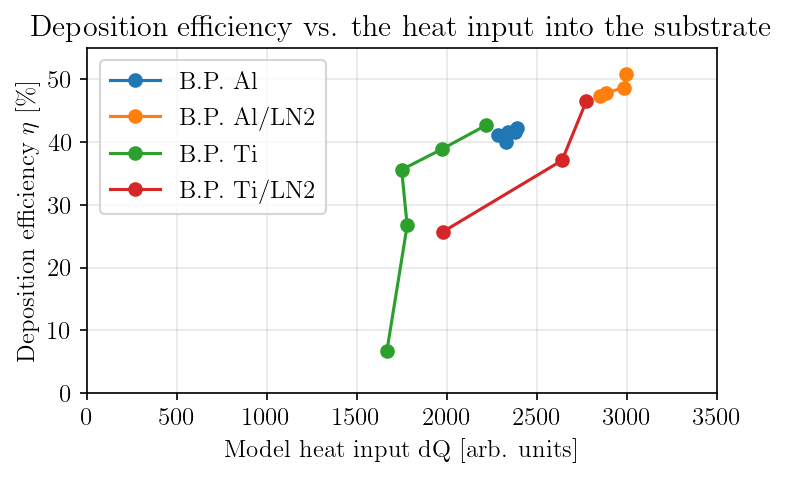

In [30]:
plt.figure()

for bp in ('Al', 'Al/LN2', 'Ti', 'Ti/LN2'):
    plt.plot(model_heat_input['Al6082', 16, :, bp], 
             100. * (deposited_mass['Al6082', 16, :, bp] / stud_mass0) / 
             ((stud_length0 - stud_length['Al6082', 16, :, bp]) / stud_length0), 
             linestyle='-', marker='o', label='B.P. %s' % bp)

plt.title('Deposition efficiency vs. the heat input into the substrate')
plt.xlabel(hi_l)
plt.ylabel(eff_l)
leg = plt.legend()
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((0, 3500, 0, 55))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'eta_vs_q_2.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0)

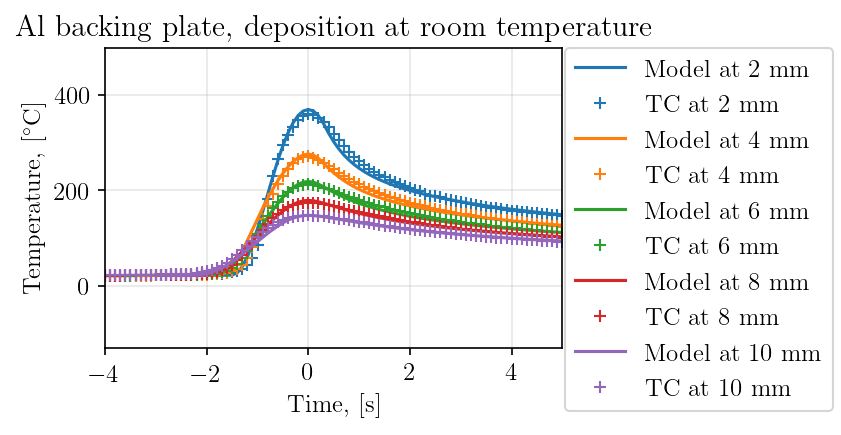

In [31]:
fig = plt.figure()

ax = plt.subplot(111)
for th in range(2, 12, 2):
    plt.plot(model_tc_data['Al6082', 16, th, 'Al'], label='Model at %d mm' % th, color=colors[th // 2 - 1])
    plt.plot(tc_data['Al6082', 16, th, 'Al'], label='TC at %d mm' % th, color=colors[th // 2 - 1], 
             marker='+', linestyle='')
plt.title('Al backing plate, deposition at room temperature')
plt.xlabel(time_l)
plt.ylabel(temp_l)
plt.axis((-4, 5, -130, 500))


plt.tight_layout()
fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.04, 0.45))
plt.grid(which='both', axis='both', alpha=0.3)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'alrt_tc_fit.png'), additional_artists=[leg], 
            bbox_inches="tight")

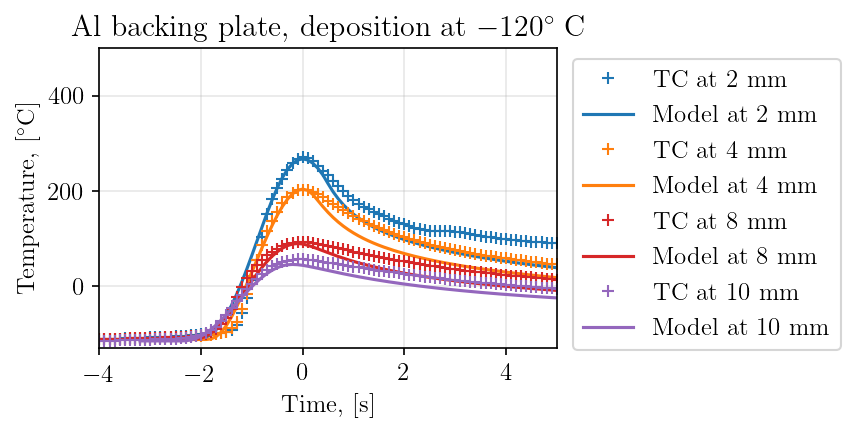

In [32]:
fig = plt.figure()

plt.subplot(111)
for th in (2, 4, 8, 10):
    dd = tc_data['Al6082', 16, th, 'Al/LN2'] - tc_data['Al6082', 16, th, 'Al/LN2'][:-4].mean() - 120
    dd2 = model_tc_data['Al6082', 16, th, 'Al/LN2'] - tc_data['Al6082', 16, th, 'Al/LN2'][:-4].mean() - 120
    if th == 8:
        dd2.index -= 0.1
    elif th == 10:
        dd2.index -= 0.2
    plt.plot(dd, label='TC at %d mm' % th, color=colors[th // 2 - 1], marker='+', linestyle='')
    plt.plot(dd2, label='Model at %d mm' % th, color=colors[th // 2 - 1])
plt.title('Al backing plate, deposition at $-120^{\circ}$ C')
plt.xlabel(time_l)
plt.ylabel(temp_l)
plt.axis((-4, 5, -130, 500))

plt.grid(which='both', axis='both', alpha=0.3)
plt.tight_layout()
fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.5))
plt.grid(which='both', axis='both', alpha=0.3)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'alln_tc_fit.png'), 
            additional_artists=[leg], bbox_inches="tight")

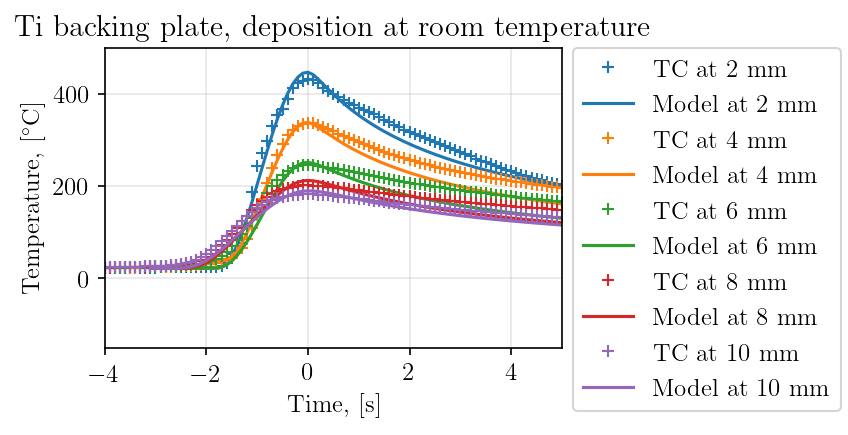

In [33]:
fig = plt.figure()

plt.subplot(111)
for th in (2, 4, 6, 8, 10): 
    dd2 = model_tc_data['Al6082', 16, th, 'Ti'].copy()
    dd2.index -= 0.1
    plt.plot(tc_data['Al6082', 16, th, 'Ti'], label='TC at %d mm' % th, color=colors[th // 2 - 1], marker='+', 
             linestyle='')
    plt.plot(dd2, label='Model at %d mm' % th, color=colors[th // 2 - 1])
plt.title('Ti backing plate, deposition at room temperature')
plt.ylabel(temp_l)
plt.xlabel(time_l)
plt.axis((-4, 5, -150, 500))

plt.tight_layout()
fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.45))
plt.grid(which='both', axis='both', alpha=0.3)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'tirt_tc_fit.png'), 
            additional_artists=[leg], bbox_inches="tight")

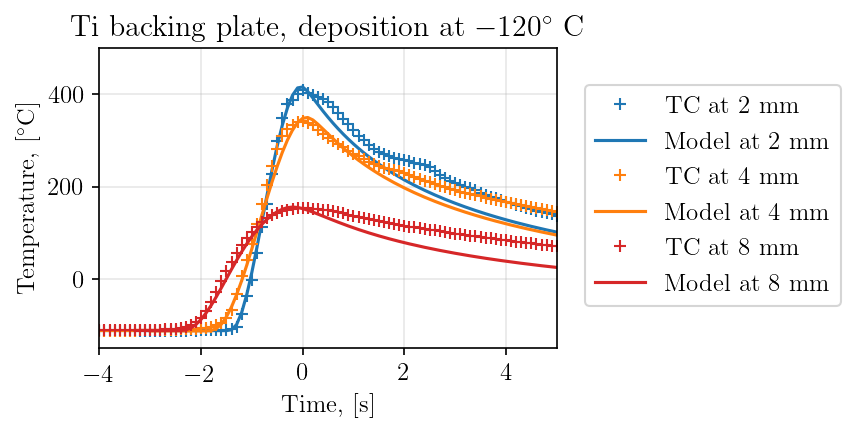

In [34]:
fig = plt.figure()

plt.subplot(111)
for th in (2, 4, 8):
    dd = tc_data['Al6082', 16, th, 'Ti/LN2'] - tc_data['Al6082', 16, th, 'Ti/LN2'][:-4].mean() - 120
    dd2 = model_tc_data['Al6082', 16, th, 'Ti/LN2'] - tc_data['Al6082', 16, th, 'Ti/LN2'][:-4].mean() - 120
    if th == 8:
        dd2.index -= 0.3
    elif th == 2:
        dd2.index -= 0.1
    plt.plot(dd, label='TC at %d mm' % th, color=colors[th // 2 - 1], marker='+', linestyle='')
    plt.plot(dd2, label='Model at %d mm' % th, color=colors[th // 2 - 1])
plt.title('Ti backing plate, deposition at $-120^{\circ}$ C')
plt.ylabel(temp_l)
plt.xlabel(time_l)
plt.axis((-4, 5, -150, 500))

plt.tight_layout()
fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.52))
plt.grid(which='both', axis='both', alpha=0.3)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'tiln_tc_fit.png'), 
            additional_artists=[leg], bbox_inches="tight")

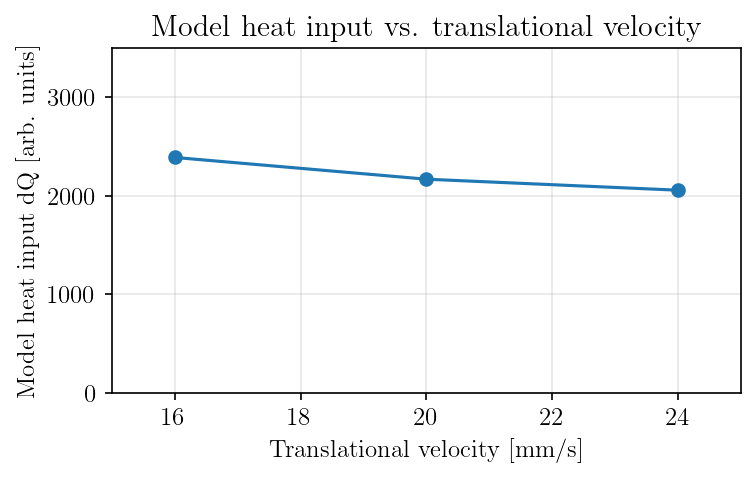

In [35]:
fig = plt.figure()
plt.title('Model heat input vs. translational velocity')
plt.plot((16, 20, 24), (2389.76, 2169.07, 2057.32), linestyle='-', marker='o', label='dQ', color=colors[0])
plt.ylabel(hi_l)
plt.xlabel('Translational velocity [mm/s]')
plt.axis((15, 25, 0, 3500))
plt.grid(which='both', axis='both', alpha=0.3)
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'dq_vs_trvel.png'), bbox_inches="tight")

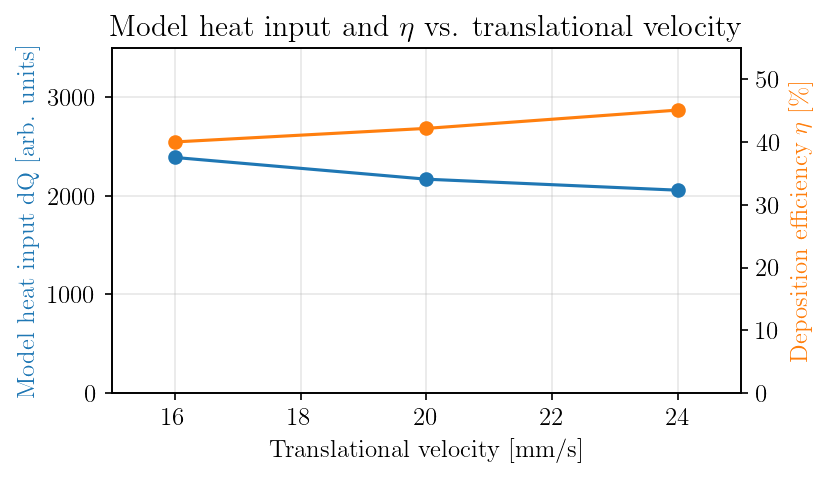

In [36]:
fig, ax1 = plt.subplots()
plt.title('Model heat input and $\eta$ vs. translational velocity')
ax1.plot((16, 20, 24), (2389.76, 2169.07, 2057.32), linestyle='-', marker='o', label='dQ', color=colors[0])
ax1.set_ylabel(hi_l, color=colors[0])
ax1.set_xlabel('Translational velocity [mm/s]')
ax1.axis((15, 25, 0, 3500))
ax1.grid(which='both', axis='both', alpha=0.3)
ax2 = ax1.twinx()
eff2 = 100. * (deposited_mass['Al6082', :, 2, 'Al'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', :, 2, 'Al']) / stud_length0)
eff4 = 100. * (deposited_mass['Al6082', :, 4, 'Al'] / stud_mass0) / ((stud_length0 - stud_length['Al6082', :, 4, 'Al']) / stud_length0)
# ax2.plot(eff2, linestyle='-', marker='o', label='dQ', color=colors[1])
ax2.plot(eff4, linestyle='-', marker='o', label='dQ', color=colors[1])
ax2.set_ylabel(eff_l, color=colors[1])
ax2.axis((15, 25, 0, 55))
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'dq_eta_vs_trvel.png'), bbox_inches="tight")

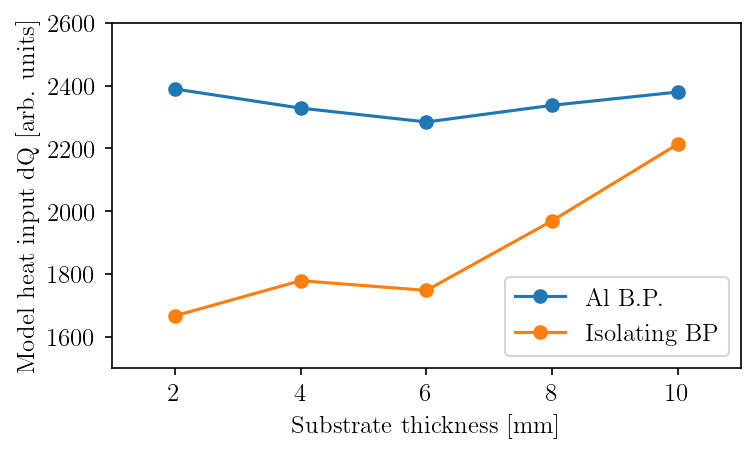

In [37]:
plt.figure()
plt.plot(model_heat_input['Al6082', 16, :, 'Al'], linestyle='-', marker='o', label='Al B.P.')
plt.plot(model_heat_input['Al6082', 16, :, 'Ti'], linestyle='-', marker='o', label='Isolating BP')
plt.axis((1, 11, 1500, 2600))
plt.legend()
plt.ylabel(hi_l)
plt.xlabel('Substrate thickness [mm]')
plt.savefig(os.path.join(plot_wd, 'POSTER' + '_' + 'q.png'), bbox_inches="tight")

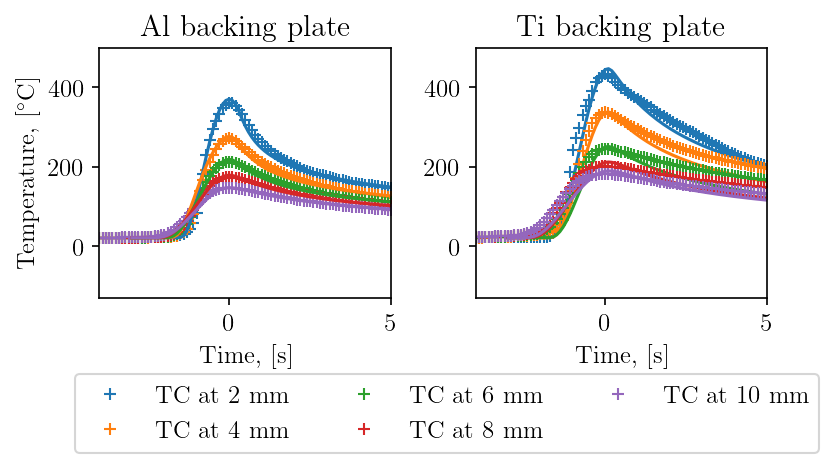

In [38]:
fig = plt.figure()

ax = plt.subplot(121)
for th in range(2, 12, 2):
    # plt.plot(model_tc_data['Al6082', 16, th, 'Al'], label='Model at %d mm' % th, color=colors[th // 2 - 1])
    plt.plot(tc_data['Al6082', 16, th, 'Al'], label='TC at %d mm' % th, color=colors[th // 2 - 1], 
             marker='+', linestyle='')
plt.title('Al backing plate')
plt.xlabel(time_l)
plt.ylabel(temp_l)
plt.axis((-4, 5, -130, 500))

leg = fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.55, -0.02))

for th in range(2, 12, 2):
    plt.plot(model_tc_data['Al6082', 16, th, 'Al'], label='Model at %d mm' % th, color=colors[th // 2 - 1])
    # plt.plot(tc_data['Al6082', 16, th, 'Al'], label='TC at %d mm' % th, color=colors[th // 2 - 1], 
    #          marker='+', linestyle='')
plt.title('Al backing plate')
plt.xlabel(time_l)
plt.ylabel(temp_l)
plt.axis((-4, 5, -130, 500))

ax = plt.subplot(122)
for th in range(2, 12, 2):
    plt.plot(model_tc_data['Al6082', 16, th, 'Ti'], label=None, color=colors[th // 2 - 1])
    plt.plot(tc_data['Al6082', 16, th, 'Ti'], label=None, color=colors[th // 2 - 1], 
             marker='+', linestyle='')
plt.title('Ti backing plate')
plt.xlabel(time_l)
# plt.ylabel(temp_l)
plt.axis((-4, 5, -130, 500))
plt.tight_layout()
fig.subplots_adjust(bottom=0.32)
# fig.subplots_adjust(right=0.7)
# leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.45))
plt.savefig(os.path.join(plot_wd, 'POSTER' + '_' + 'tc.png'), bbox_inches="tight")